In [2]:
import sys

sys.path.append("../")
from counterplots import CreatePlot

In [3]:
# Import artificial dataset generator from sklearn
from sklearn.datasets import make_classification
# Import SVC
from sklearn.svm import SVC
# Import data splitting function
from sklearn.model_selection import train_test_split

from nice import NICE

import numpy as np

In [ ]:
# Data Load
df, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, n_classes=2, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1)

In [ ]:
# Model Creation
model = SVC(kernel='linear', random_state=1, probability=True)

model.fit(X_train, y_train)

In [5]:
# NICE CF generator
NICE_gen = NICE(
    X_train = X_train,
    predict_fn=model.predict_proba,
    y_train = y_train,
    cat_feat=[],
    num_feat=[*range(X_test.shape[1])],
    )

In [6]:
# Factual and CF point generation
fac = X_test[9]
cf = NICE_gen.explain(np.array([fac]))[0]

In [13]:
counterplot = CreatePlot(
    fac, 
    cf, 
    model.predict_proba)

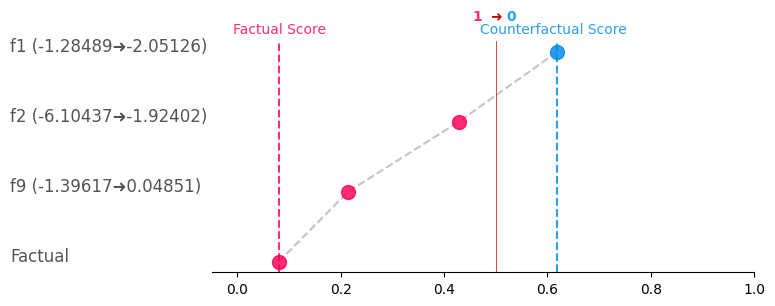

In [14]:
counterplot.greedy()

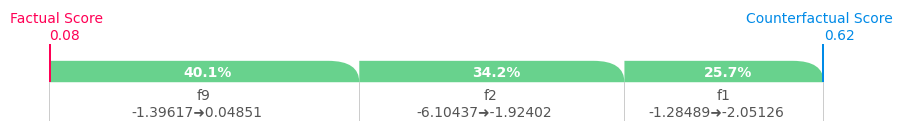

In [15]:
counterplot.countershapley()

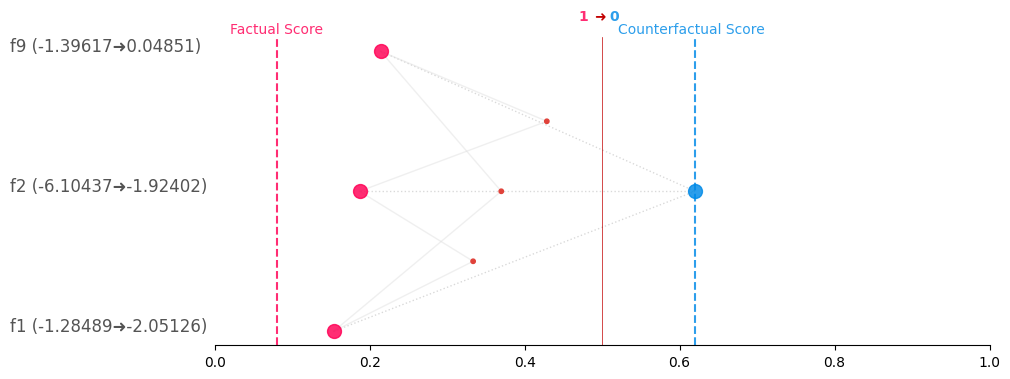

In [16]:
counterplot.constellation()

In [17]:
# Mock Model for controlled experiments
def mock_model(x):
    output = []
    for r in x:
        if r[0] == 20 and r[1] == 1200:
            output.append(0.2)
        elif r[0] == 20 and r[1] == 4000:
            output.append(0.35)
        elif r[0] == 28 and r[1] == 1200:
            output.append(0.3)
        elif r[0] == 28 and r[1] == 4000:
            output.append(0.95)
    
    return np.array(output).reshape(-1,1)

In [18]:
fac_mock = np.array([20, 1200])
cf_mock = np.array([28, 4000])

In [19]:
counterplot_mock = CreatePlot(
    fac_mock, 
    cf_mock, 
    mock_model, 
    ['Age', 'Salary'],
    {0: 'rejected', 1: 'approved'})

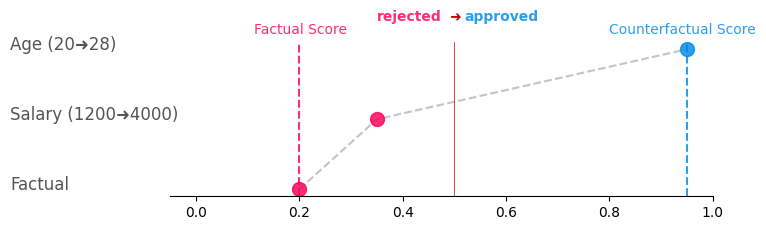

In [21]:
counterplot_mock.greedy()

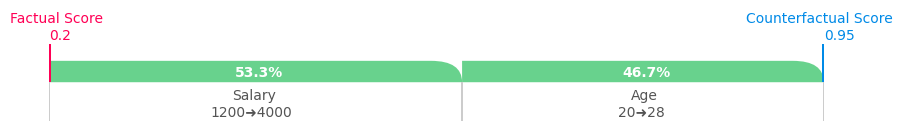

In [22]:
counterplot_mock.countershapley()

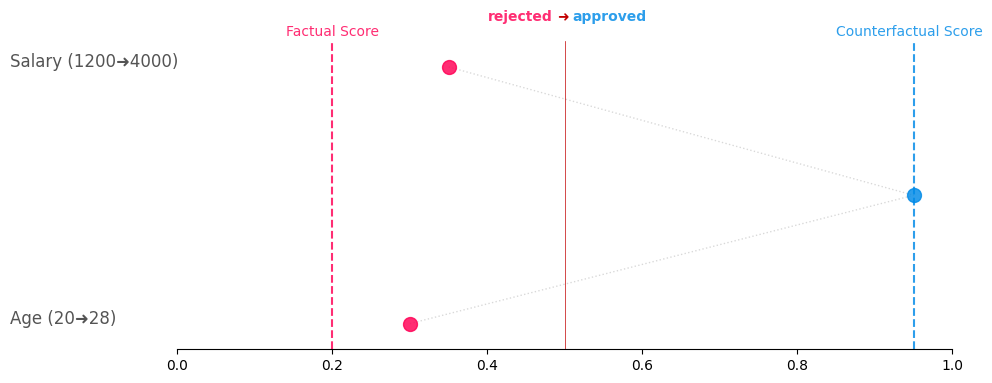

In [23]:
counterplot_mock.constellation()